<a href="https://colab.research.google.com/github/veronikahill/HeartDisease/blob/main/FinalProject_VeronikaHill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Step (1) - Finding a publicly available dataset in any healthcare setting - heart_dataset below
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Step(2) - Loading the dataset into your Python IDE
#getting dataset #exploring dataset

heart_dataset = pd.read_csv('/content/drive/MyDrive/Pitt/FinalProject/heart.csv')


In [ ]:

heart_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Shape of the dataframe
print ("Number of Data Records:", len(heart_dataset))
print ("Dataset Shape:", heart_dataset.shape)

Number of Data Records: 918
Dataset Shape: (918, 12)


In [ ]:
#While I do believe Cholesterol is an important factor in predicting heart disease, there are may patients that have 0 under this column.
#Therefore, I will drop this column as to not skew results.

heart_dataset = heart_dataset.drop(["Cholesterol"], axis = 1)

In [ ]:
#showing data records


heart_dataset.head(5)

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0


In [ ]:
# Accessing a certain row/column
heart_dataset.loc[1].iat[3]

160

In [ ]:
# Accessing a certain row
heart_dataset.iloc[3]

Age                   48
Sex                    F
ChestPainType        ASY
RestingBP            138
FastingBS              0
RestingECG        Normal
MaxHR                108
ExerciseAngina         Y
Oldpeak              1.5
ST_Slope            Flat
HeartDisease           1
Name: 3, dtype: object

In [ ]:
#resting BP column values into a list

resting_BP = heart_dataset.iloc[:, 3]

bp_numerical = resting_BP.tolist()

print (bp_numerical)

[140, 160, 130, 138, 150, 120, 130, 110, 140, 120, 130, 136, 120, 140, 115, 120, 110, 120, 100, 120, 100, 120, 124, 150, 130, 130, 124, 120, 113, 125, 145, 130, 125, 130, 150, 125, 140, 110, 120, 150, 150, 130, 150, 140, 120, 130, 120, 140, 112, 110, 130, 120, 140, 130, 130, 160, 120, 130, 150, 112, 100, 150, 140, 120, 110, 120, 132, 110, 160, 150, 140, 130, 120, 120, 140, 150, 118, 140, 140, 130, 110, 120, 150, 160, 150, 140, 170, 140, 120, 140, 110, 130, 120, 160, 110, 130, 142, 160, 120, 125, 130, 130, 150, 120, 118, 140, 120, 150, 140, 190, 130, 150, 140, 140, 130, 100, 120, 130, 120, 140, 135, 125, 110, 180, 130, 120, 130, 108, 120, 120, 145, 110, 170, 150, 130, 115, 120, 120, 140, 150, 160, 140, 160, 140, 120, 110, 120, 120, 120, 130, 130, 100, 130, 120, 120, 155, 110, 140, 130, 160, 140, 128, 160, 120, 140, 140, 140, 140, 135, 140, 120, 140, 140, 140, 140, 140, 140, 140, 130, 130, 130, 130, 140, 110, 160, 160, 130, 120, 120, 180, 180, 170, 130, 135, 125, 160, 120, 150, 120, 130,

In [ ]:
#sorting dataset by "HeartDisease" column
heart_dataset_sorted_by_name = heart_dataset.sort_values(by='HeartDisease', ignore_index=True)
heart_dataset_sorted_by_name.head(21)

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,65,M,ASY,120,0,Normal,140,N,0.4,Up,0
2,74,F,ATA,120,0,LVH,121,Y,0.2,Up,0
3,64,M,ASY,128,0,Normal,105,Y,0.2,Flat,0
4,67,F,NAP,115,0,LVH,160,N,1.6,Flat,0
5,58,M,ASY,140,1,LVH,135,N,0.3,Up,0
6,62,M,TA,135,0,ST,137,N,0.2,Up,0
7,51,F,ASY,114,1,LVH,96,N,1.0,Up,0
8,68,M,NAP,134,1,Normal,151,Y,0.0,Up,0
9,57,M,ASY,130,0,ST,96,Y,1.0,Flat,0


In [ ]:
#selecting subset of heart disease outcome
heart_disease = heart_dataset[heart_dataset.HeartDisease == 1]
heart_disease.head(10)

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,0,Normal,140,Y,1.0,Flat,1
16,38,M,ASY,110,0,Normal,166,N,0.0,Flat,1
18,60,M,ASY,100,0,Normal,125,N,1.0,Flat,1
19,36,M,ATA,120,0,Normal,160,N,3.0,Flat,1
23,44,M,ATA,150,0,Normal,150,Y,3.0,Flat,1
30,53,M,NAP,145,0,Normal,130,N,0.0,Flat,1


In [ ]:
#selecting subset of Normal outcome
normal = heart_dataset[heart_dataset.HeartDisease == 0]
normal.head(10)

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,0,Normal,142,N,0.0,Up,0
9,48,F,ATA,120,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130,0,Normal,142,N,0.0,Up,0
12,39,M,ATA,120,0,Normal,145,N,0.0,Up,0
14,42,F,NAP,115,0,ST,137,N,0.0,Up,0


In [ ]:
#selecting subset of Male

male = heart_dataset[heart_dataset.Sex == "M"]

male_hd = male[male.HeartDisease == 1]
male_normal = male[male.HeartDisease == 0]

#subset of males w/ HD and lower blood sugar
male_low_bs = male_hd[male_hd.FastingBS == 0]
#males with HD and higher blood sugar
male_high_bs = male_hd[male_hd.FastingBS == 1]



#shape of male dataset
print ("Number of All Data Records:", len(male))
print ("Dataset Shape:", male.shape)



#shape of males with heart disease dataframe
print ("Number of Heart Disease Data Records:", len(male_hd))
print ("Dataset Shape:", male_hd.shape)

#shape of males without heart disease
print ("Number of Normal Data Records:", len(male_normal))
print ("Dataset Shape:", male_normal.shape)

#shape of males with heart disease and high/low fasting Blood sugar
print ("Number of Males with Heart Disease and High Blood Sugar Records: ", len(male_high_bs))
print ("Number of Males with Heart Disease and Lower Blood Sugar Records: ", len(male_low_bs))



male.head(10)

Number of All Data Records: 725
Dataset Shape: (725, 11)
Number of Heart Disease Data Records: 458
Dataset Shape: (458, 11)
Number of Normal Data Records: 267
Dataset Shape: (267, 11)
Number of Males with Heart Disease and High Blood Sugar Records:  154
Number of Males with Heart Disease and Lower Blood Sugar Records:  304


,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,0,ST,99,Y,2.0,Flat,1
12,39,M,ATA,120,0,Normal,145,N,0.0,Up,0
13,49,M,ASY,140,0,Normal,140,Y,1.0,Flat,1
16,38,M,ASY,110,0,Normal,166,N,0.0,Flat,1


In [ ]:
#selecting subset of Female


female = heart_dataset[heart_dataset.Sex == "F"]
female.head(10)

female_hd = female[female.HeartDisease == 1]
female_normal = female[female.HeartDisease == 0]

female.head(10)

#shape of female dataset
print ("Number of All Data Records:", len(female))
print ("Dataset Shape:", female.shape)



#shape of females with heart disease dataframe
print ("Number of Heart Disease Data Records:", len(female_hd))
print ("Dataset Shape:", female_hd.shape)

#shape of females without heart disease
print ("Number of Normal Data Records:", len(female_normal))
print ("Dataset Shape:", female_normal.shape)

female.head(10)

Number of All Data Records: 193
Dataset Shape: (193, 11)
Number of Heart Disease Data Records: 50
Dataset Shape: (50, 11)
Number of Normal Data Records: 143
Dataset Shape: (143, 11)


,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
6,45,F,ATA,130,0,Normal,170,N,0.0,Up,0
9,48,F,ATA,120,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130,0,Normal,142,N,0.0,Up,0
14,42,F,NAP,115,0,ST,137,N,0.0,Up,0
15,54,F,ATA,120,0,Normal,150,N,1.5,Flat,0
17,43,F,ATA,120,0,Normal,165,N,0.0,Up,0
20,43,F,TA,100,0,Normal,142,N,0.0,Up,0
22,49,F,ATA,124,0,Normal,164,N,0.0,Up,0


In [ ]:
#making female and make BP columns into lists

female_bp = female.iloc[:, 3]
female_bp_list = female_bp.tolist()


male_bp = male.iloc[:,3]
male_bp_list = male_bp.tolist()

#making female and male Age columns into lists

female_age = female.iloc[:, 0]
female_age_list = female_age.tolist()

male_age = male.iloc[:, 0]
male_age_list = male_age.tolist()


male_hd_bp = male_hd.iloc[:,3]
male_normal_bp = male_normal.iloc[:,3]

age_mnbp = male_normal.iloc[:,0]
age_mhdbp = male_hd.iloc[:,0]


#making lists of males bp w/ and w/o HD

male_normal_bp_list = male_normal_bp.tolist()
male_hd_bp_list = male_hd_bp.tolist()

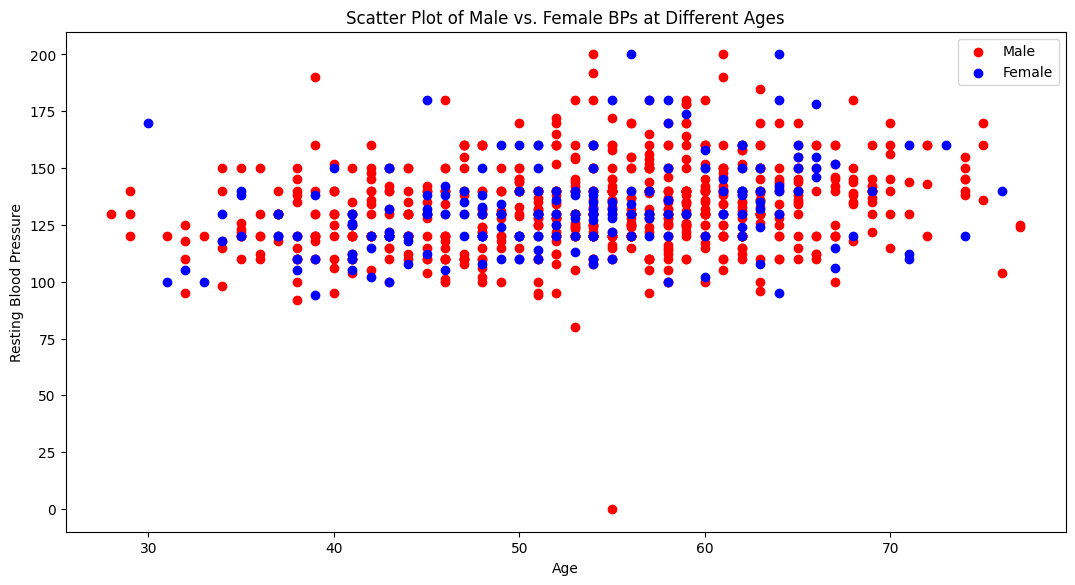

In [ ]:
#scatter plot of men vs women's resting blood pressure

import matplotlib.pyplot as plt

female_bp = female_bp_list
male_bp = male_bp_list
figure=plt.figure(figsize = (10,5))
ax=figure.add_axes([2,2,1,1])
ax.scatter(male_age_list, male_bp, color='r', label="Male")
ax.scatter(female_age_list, female_bp, color='b', label="Female")
plt.legend(loc="upper right")
ax.set_xlabel('Age')
ax.set_ylabel('Resting Blood Pressure')
ax.set_title('Scatter Plot of Male vs. Female BPs at Different Ages')
plt.show()

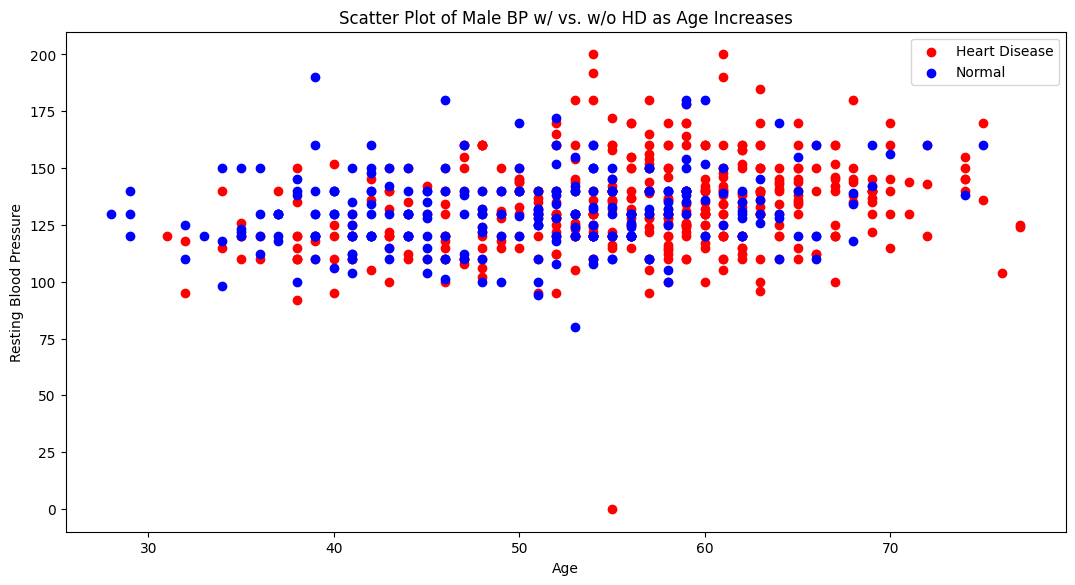

In [ ]:
#scatter plot of male blood pressures w/ vs. w/out heart disease

import matplotlib.pyplot as plt

#list of bp of males w/ hd
#list of bp of males w/o hd


figure=plt.figure(figsize = (10,5))
ax=figure.add_axes([0,0,1,1])
ax.scatter(age_mhdbp, male_hd_bp_list, color='r', label="Heart Disease")
ax.scatter(age_mnbp, male_normal_bp_list, color='b', label="Normal")
plt.legend(loc="upper right")
ax.set_xlabel('Age')
ax.set_ylabel('Resting Blood Pressure')
ax.set_title('Scatter Plot of Male BP w/ vs. w/o HD as Age Increases')
plt.show()

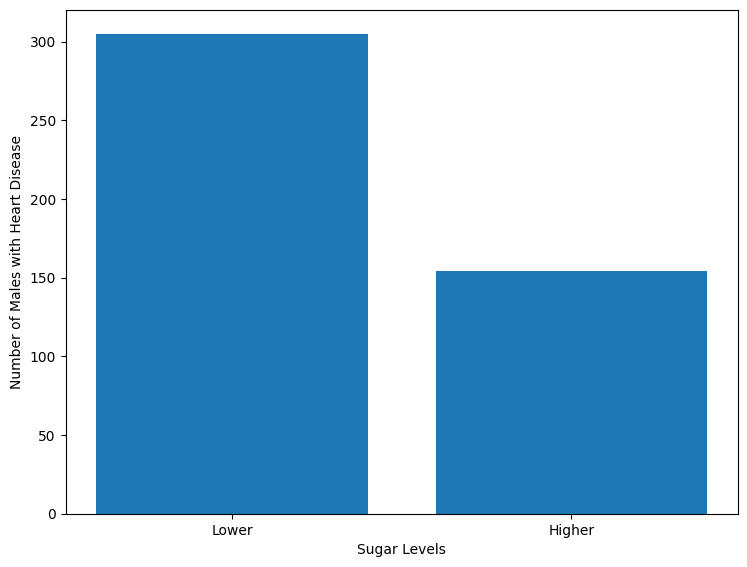

In [ ]:
# Bar plot of Blood Sugar Levels for Males with Heart Disease

import matplotlib.pyplot as plt

figure = plt.figure()
ax = figure.add_axes([0, 0, 1.05, 1.05])
sugars = ["Lower", "Higher"]
males_with_hd = [305,154]
ax.bar(sugars, males_with_hd)
ax.set_ylabel('Number of Males with Heart Disease')
ax.set_xlabel('Sugar Levels')
plt.show()

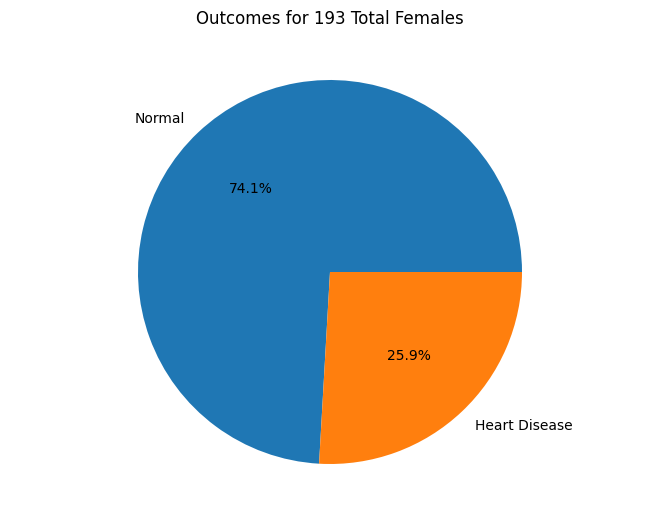

In [ ]:
#pie chart of female outcomes

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.axis('equal')
outcomes = ["Normal", "Heart Disease"]
all_females = [143, 50]
ax.pie(all_females, labels = outcomes,autopct='%1.1f%%')
ax.set_title("Outcomes for 193 Total Females")
plt.show()

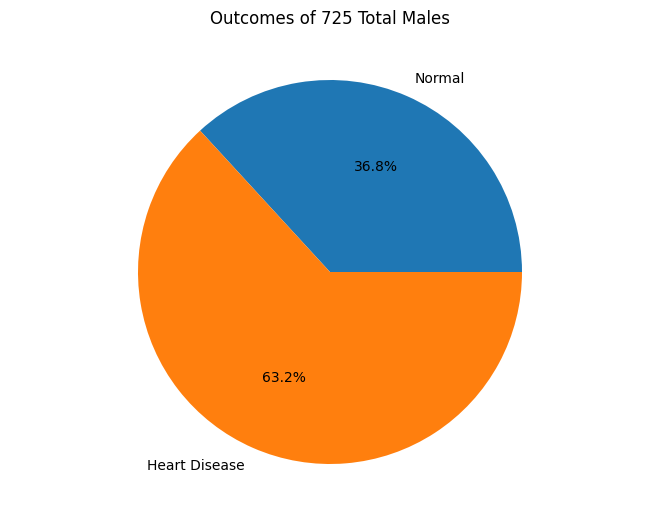

In [ ]:
#pie chart of male outcomes

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.axis('equal')
outcomes = ["Normal", "Heart Disease"]
all_males = [267, 458]
ax.pie(all_males, labels = outcomes,autopct='%1.1f%%')
ax.set_title("Outcomes of 725 Total Males")
plt.show()

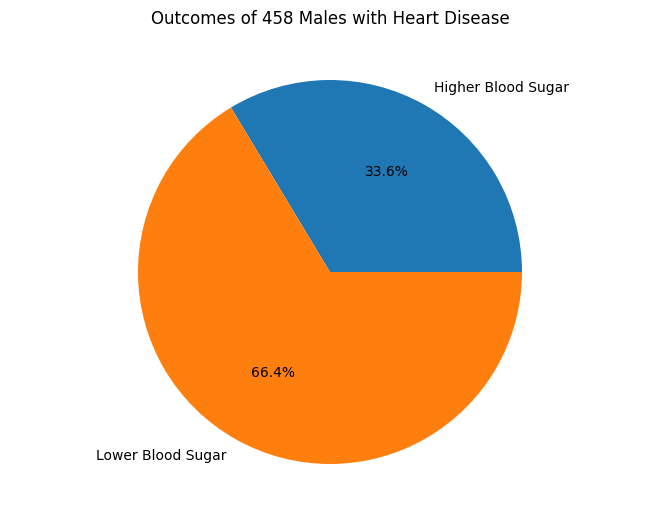

In [ ]:
#piechart of males w/ HD and high vs lower blood sugar

figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
ax.axis('equal')
outcomes = ["Higher Blood Sugar", "Lower Blood Sugar"]
all_hd_males = [154, 304]
ax.pie(all_hd_males, labels = outcomes,autopct='%1.1f%%')
ax.set_title("Outcomes of 458 Males with Heart Disease")
plt.show()

In [ ]:
#Step (4) - Making the dataset available for “Supervised” Machine Learning algorithms


#changing alpha values to numeric values:
heart_dataset['Sex'].replace({"M":0, "F":1}, inplace=True)
heart_dataset['ChestPainType'].replace({"ATA":0, "NAP":1, "ASY":2, "TA":3}, inplace=True)
heart_dataset['RestingECG'].replace({"Normal": 0, "ST": 1, "LVH": 2}, inplace=True)
heart_dataset["ExerciseAngina"].replace({"N": 0, "Y": 1}, inplace=True)
heart_dataset["ST_Slope"].replace({"Up": 0, "Flat": 1, "Down":2}, inplace=True)



# Separating variables from outcome(s)
X = heart_dataset.drop(["HeartDisease"], axis = 1) # Variables
Y = heart_dataset.HeartDisease.values  # Outcome

X.head(5)


,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,0,0,172,0,0.0,0
1,49,1,1,160,0,0,156,0,1.0,1
2,37,0,0,130,0,1,98,0,0.0,0
3,48,1,2,138,0,0,108,1,1.5,1
4,54,0,1,150,0,0,122,0,0.0,0


In [ ]:
# Age, RestingBP, and MaxHR need to be normalized
#So, normalizing all the variables

from sklearn import preprocessing

X = X.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(X_scaled)
df

,0,1,2,3,4,5,6,7,8,9
0,0.244898,0.0,0.000000,0.70,0.0,0.0,0.788732,0.0,0.295455,0.0
1,0.428571,1.0,0.333333,0.80,0.0,0.0,0.676056,0.0,0.409091,0.5
2,0.183673,0.0,0.000000,0.65,0.0,0.5,0.267606,0.0,0.295455,0.0
3,0.408163,1.0,0.666667,0.69,0.0,0.0,0.338028,1.0,0.465909,0.5
4,0.530612,0.0,0.333333,0.75,0.0,0.0,0.436620,0.0,0.295455,0.0
...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.0,1.000000,0.55,0.0,0.0,0.507042,0.0,0.431818,0.5
914,0.816327,0.0,0.666667,0.72,1.0,0.0,0.570423,0.0,0.681818,0.5
915,0.591837,0.0,0.666667,0.65,0.0,0.0,0.387324,1.0,0.431818,0.5
916,0.591837,1.0,0.000000,0.65,0.0,1.0,0.802817,0.0,0.295455,0.5


In [ ]:
#Step (5) - Building and evaluating machine learning predictive models

# Importing built-in ML packages
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support


# Naive Bayes and Decision Tree models with the use of K-fold cross validation

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

cv_data = KFold(n_splits=5, random_state=1, shuffle=True)

accuracy_results_NB = cross_validate(GaussianNB(), X, Y, cv=cv_data, scoring=['accuracy'], return_train_score=True)

accuracy_results_DT = cross_validate(DecisionTreeClassifier(max_depth=3, min_samples_split=10), X, Y, cv=cv_data, scoring=['accuracy'], return_train_score=True)

print("NB accuracy score on the Train set:", np.around(accuracy_results_NB['train_accuracy'], 2))
print("NB Mean Accuracy score on the Train set: %.2f"% accuracy_results_NB['train_accuracy'].mean())
print("\nNB Accuracy score on Test set:", np.around(accuracy_results_NB['test_accuracy'], 3))
print("NB Mean Accuracy score on the Test set: %.2f" %accuracy_results_NB['test_accuracy'].mean())

print("\n")

print("\nDT accuracy score on the Train set:", np.around(accuracy_results_DT['train_accuracy'], 2))
print("DT mean Accuracy score on the Train set: %.2f"% accuracy_results_DT['train_accuracy'].mean())
print("\nDT accuracy score on Test set:", np.around(accuracy_results_DT['test_accuracy'], 3))
print("DT mean Accuracy score on the Test set: %.2f" %accuracy_results_DT['test_accuracy'].mean())

NB accuracy score on the Train set: [0.83 0.85 0.84 0.85 0.84]
NB Mean Accuracy score on the Train set: 0.84

NB Accuracy score on Test set: [0.897 0.793 0.848 0.825 0.831]
NB Mean Accuracy score on the Test set: 0.84



DT accuracy score on the Train set: [0.86 0.86 0.85 0.86 0.85]
DT mean Accuracy score on the Train set: 0.85

DT accuracy score on Test set: [0.853 0.788 0.853 0.842 0.809]
DT mean Accuracy score on the Test set: 0.83


In [ ]:
#Precision and Recall (Sensitivity) scores


# Function to calculate precision and recall for each fold
def calc_precision_recall(model, X, Y, cv_data):
    precisions = []
    recalls = []

    for train_index, test_index in cv_data.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        precision, recall, _, _ = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
        precisions.append(precision)
        recalls.append(recall)

    return np.mean(precisions), np.mean(recalls)

# Naive Bayes model
NB_model = GaussianNB()
precision_NB, recall_NB = calc_precision_recall(NB_model, X, Y, cv_data)
print("NB Mean Precision: {:.2f}".format(precision_NB))
print("NB Mean Recall: {:.2f}".format(recall_NB))

# Decision Tree model
DT_model = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
precision_DT, recall_DT = calc_precision_recall(DT_model, X, Y, cv_data)
print("DT Mean Precision: {:.2f}".format(precision_DT))
print("DT Mean Recall: {:.2f}".format(recall_DT))

NB Mean Precision: 0.84
NB Mean Recall: 0.84
DT Mean Precision: 0.84
DT Mean Recall: 0.84


In [ ]:
#steps 6 and 7 in powerpoint